In [1]:
#Load Modules
import numpy as np
import pandas as pd
import statistics as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [17]:
df.shape

(768, 9)

In [18]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

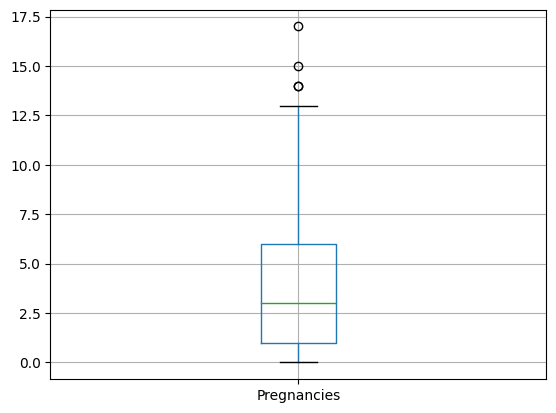

In [9]:
df.boxplot(column=["Pregnancies"])

<Axes: >

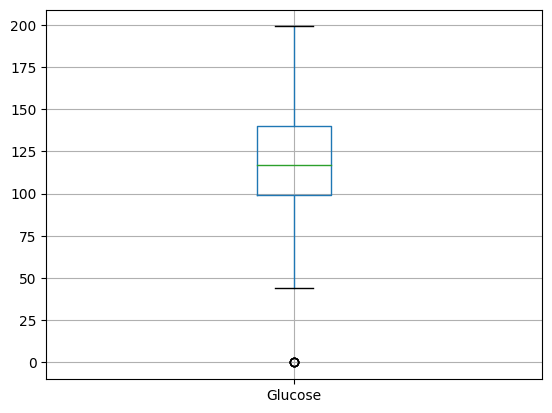

In [8]:
df.boxplot(column=["Glucose"])

<Axes: >

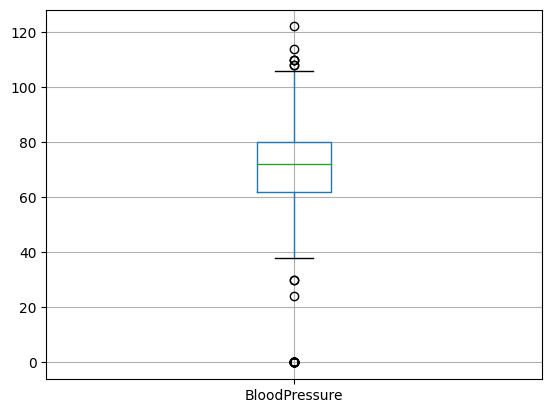

In [10]:
df.boxplot(column=["BloodPressure"])

<Axes: >

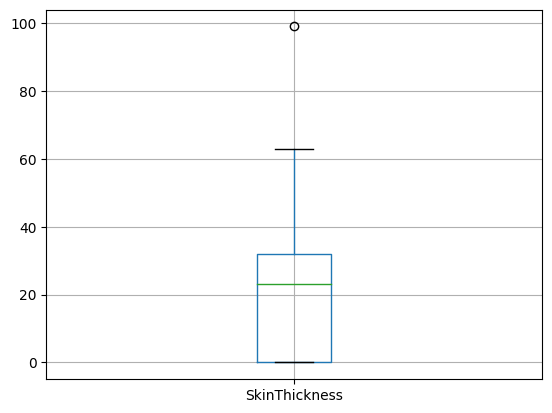

In [11]:
df.boxplot(column=["SkinThickness"])

<Axes: >

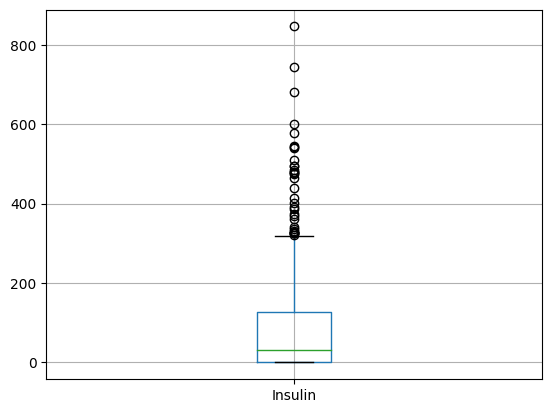

In [12]:
df.boxplot(column=["Insulin"])

<Axes: >

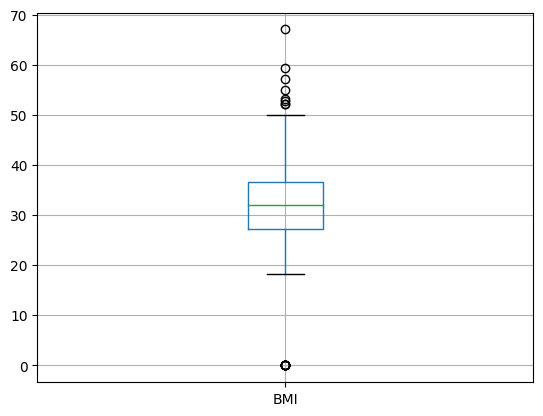

In [13]:
df.boxplot(column=["BMI"])

<Axes: >

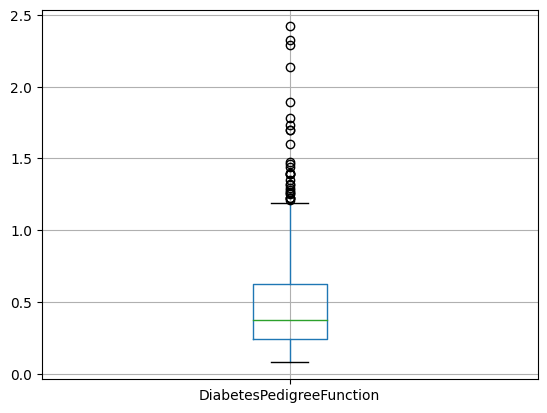

In [14]:
df.boxplot(column=["DiabetesPedigreeFunction"])

<Axes: >

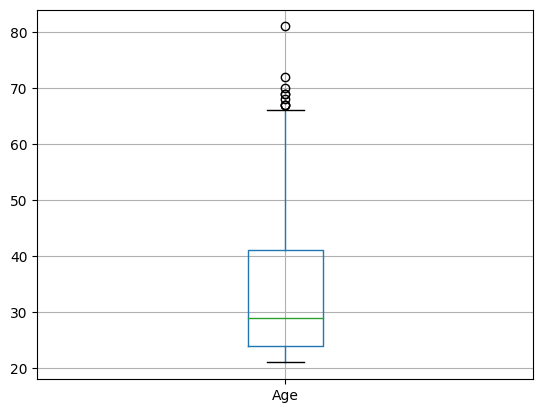

In [15]:
df.boxplot(column=["Age"])

In [20]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [19]:
def remove_outlier(col):
  sorted(col)
  Q1,Q3 = col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_range = Q1 - 1.5*IQR
  upper_range = Q3 + 1.5*IQR
  return lower_range,upper_range

In [21]:
low_preg,high_preg = remove_outlier(df["Pregnancies"])
df["Pregnancies"]= np.where(df["Pregnancies"]>high_preg,high_preg,df["Pregnancies"])
df["Pregnancies"]= np.where(df["Pregnancies"]<low_preg,low_preg,df["Pregnancies"])

In [23]:
low_glucose,high_glucose = remove_outlier(df["Glucose"])
df["Glucose"]= np.where(df["Glucose"]>high_glucose,high_glucose,df["Glucose"])
df["Glucose"]= np.where(df["Glucose"]<low_glucose,low_glucose,df["Glucose"])

In [24]:
low_BP,high_BP = remove_outlier(df["BloodPressure"])
df["BloodPressure"]= np.where(df["BloodPressure"]>high_BP,high_BP,df["BloodPressure"])
df["BloodPressure"]= np.where(df["BloodPressure"]<low_BP,low_BP,df["BloodPressure"])

In [25]:
low_ST,high_ST = remove_outlier(df["SkinThickness"])
df["SkinThickness"]= np.where(df["SkinThickness"]>high_ST,high_ST,df["SkinThickness"])
df["SkinThickness"]= np.where(df["SkinThickness"]<low_ST,low_ST,df["SkinThickness"])

In [26]:
low_Ins,high_Ins = remove_outlier(df["Insulin"])
df["Insulin"]= np.where(df["Insulin"]>high_Ins,high_Ins,df["Insulin"])
df["Insulin"]= np.where(df["Insulin"]<low_Ins,low_Ins,df["Insulin"])

In [27]:
low_BMI,high_BMI = remove_outlier(df["BMI"])
df["BMI"]= np.where(df["BMI"]>high_BMI,high_BMI,df["BMI"])
df["BMI"]= np.where(df["BMI"]<low_BMI,low_BMI,df["BMI"])

In [28]:
low_DPF,high_DPF = remove_outlier(df["DiabetesPedigreeFunction"])
df["DiabetesPedigreeFunction"]= np.where(df["DiabetesPedigreeFunction"]>high_DPF,high_DPF,df["DiabetesPedigreeFunction"])
df["DiabetesPedigreeFunction"]= np.where(df["DiabetesPedigreeFunction"]<low_DPF,low_DPF,df["DiabetesPedigreeFunction"])

In [31]:
low_Age,high_Age = remove_outlier(df["Age"])
df["Age"]= np.where(df["Age"]>high_Age,high_Age,df["Age"])
df["Age"]= np.where(df["Age"]<low_Age,low_Age,df["Age"])

<Axes: >

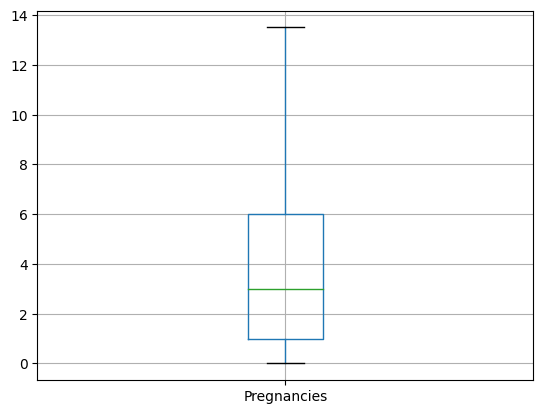

In [32]:
df.boxplot(column=["Pregnancies"])

<Axes: >

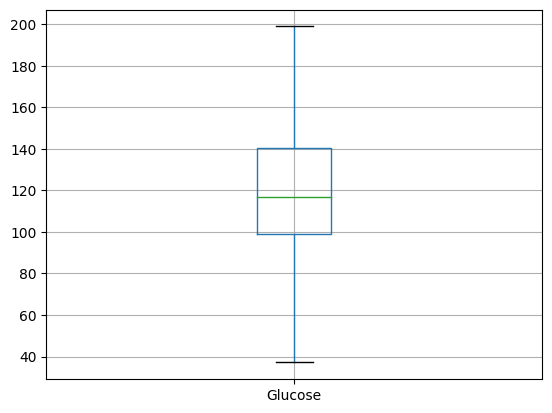

In [33]:
df.boxplot(column=["Glucose"])

<Axes: >

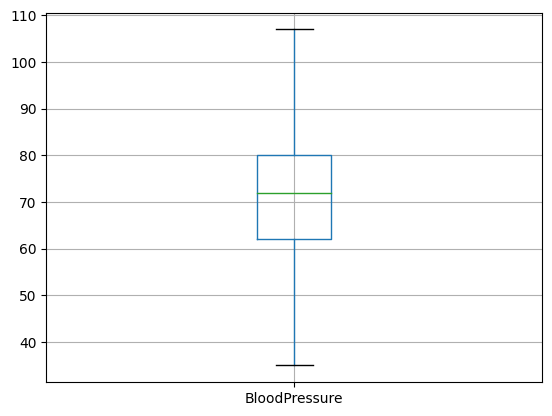

In [34]:
df.boxplot(column=["BloodPressure"])

<Axes: >

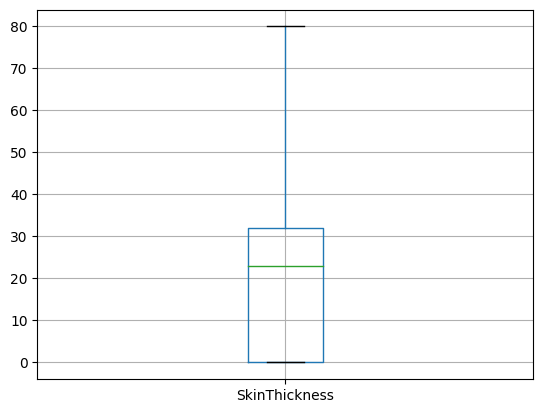

In [35]:
df.boxplot(column=["SkinThickness"])

<Axes: >

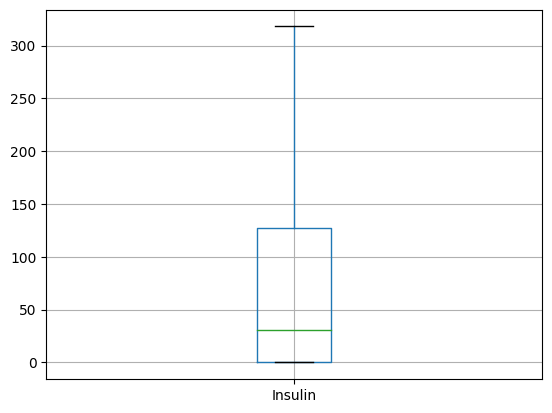

In [36]:
df.boxplot(column=["Insulin"])

<Axes: >

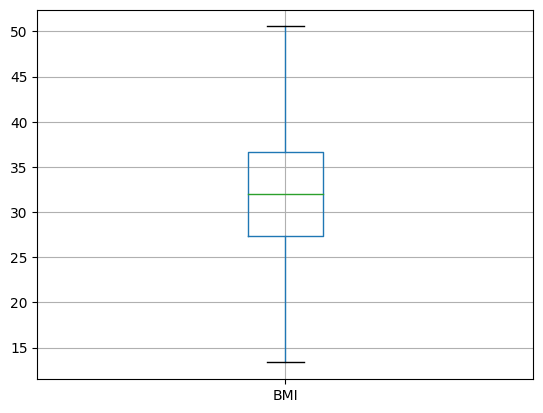

In [37]:
df.boxplot(column=["BMI"])

<Axes: >

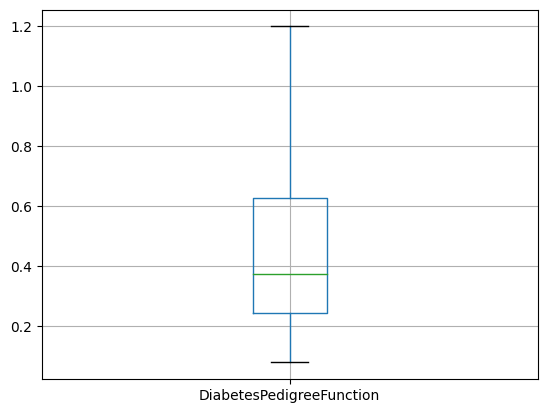

In [38]:
df.boxplot(column=["DiabetesPedigreeFunction"])

<Axes: >

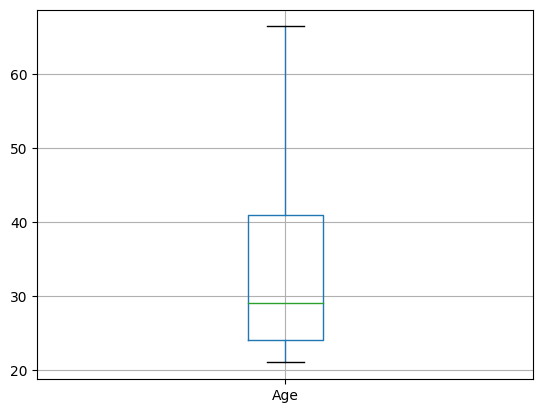

In [39]:
df.boxplot(column=["Age"])

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = df.drop(['Outcome'],axis = 1)
y = df[['Outcome']]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [50]:
RFC = RandomForestClassifier(n_estimators=100, random_state=42)

In [51]:
RFC.fit(x_train_scaled,y_train)

<ipython-input-51-6554f9787d01>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(x_train_scaled,y_train)


RandomForestClassifier(random_state=42)

In [52]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on the test set
y_pred = RFC.predict(x_test_scaled)

In [53]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [54]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       146
           1       0.77      0.64      0.70        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [57]:
# Preprocess and normalize the new patient's report
new_patient_report = pd.DataFrame({'Pregnancies':[5],'Glucose':[111],'BloodPressure':[68],'SkinThickness':[40],'Insulin':[0],'BMI':[23.5],'DiabetesPedigreeFunction':[0.456],'Age':[35]})  # Replace with the new patient's data
new_patient_report_scaled = scaler.transform(new_patient_report)

# Make predictions
new_patient_prediction = RFC.predict(new_patient_report_scaled)
print(f'Predicted Disease: {new_patient_prediction}')

Predicted Disease: [0]
